In [12]:
from google.colab import files
files.upload()

Saving dum_data.csv to dum_data.csv


{'dum_data.csv': b'Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.50,4.92,0.24\r\n3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.95,29.25,3.61\r\nAavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,#N/A,0.00,0.00\r\nABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.15,41.88,2.25\r\nAbbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.68,17.60,2.50\r\nAccelya Solutions India Ltd.,437.52,114.21,65.54,102.75,147.45,4.88,0.02,88.43,81.57,1.08,86.00,18.34,2.56,0.84\r\nAegis Logistics Ltd.,4463.83,4.50,1.00,15.71,11.84,5.09,14.47,-147.17,19.68,-7.48,33.94,20.70,14.44,0.26\r\nAGC Networks Ltd.,994.60,22.65,12.73,43.40,53.11,2.92,0.80,-46.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
data = pd.read_csv('dum_data.csv')

In [10]:
#data = pd.read_csv('dataset.csv')
data1 = pd.read_csv('dataset1.csv')
data2 = pd.read_csv('dataset2.csv')
data3 = pd.read_csv('dataset3.csv')

In [14]:
data.shape

(467, 15)

In [15]:
data.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.50,4.92,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.95,29.25,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,NaN,0.00,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.15,41.88,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.68,17.60,2.50


In [16]:
test = data.iloc[:,:]

In [17]:
data = data.replace( ' -   ', np.nan)

In [18]:
data.dtypes

Company Name                     object
Net Sales                       float64
PBIDTM (%)                      float64
PATM (%)                        float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
Cons OCF                        float64
Cons PAT                        float64
OCF/PAT                         float64
FR_Dividend Pay Out Ratio(%)    float64
Free Float                      float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [ ]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [19]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [20]:
data.fillna(data.mean(), inplace=True)

In [21]:
len(data.columns)

15

# **Ev/EBITDA Prediction**

In [22]:
data1 = data.iloc[:,:-1 ]

In [23]:
data1.head()


,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.500000,4.92
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.950000,29.25
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,22.332181,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.150000,41.88
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.680000,17.60


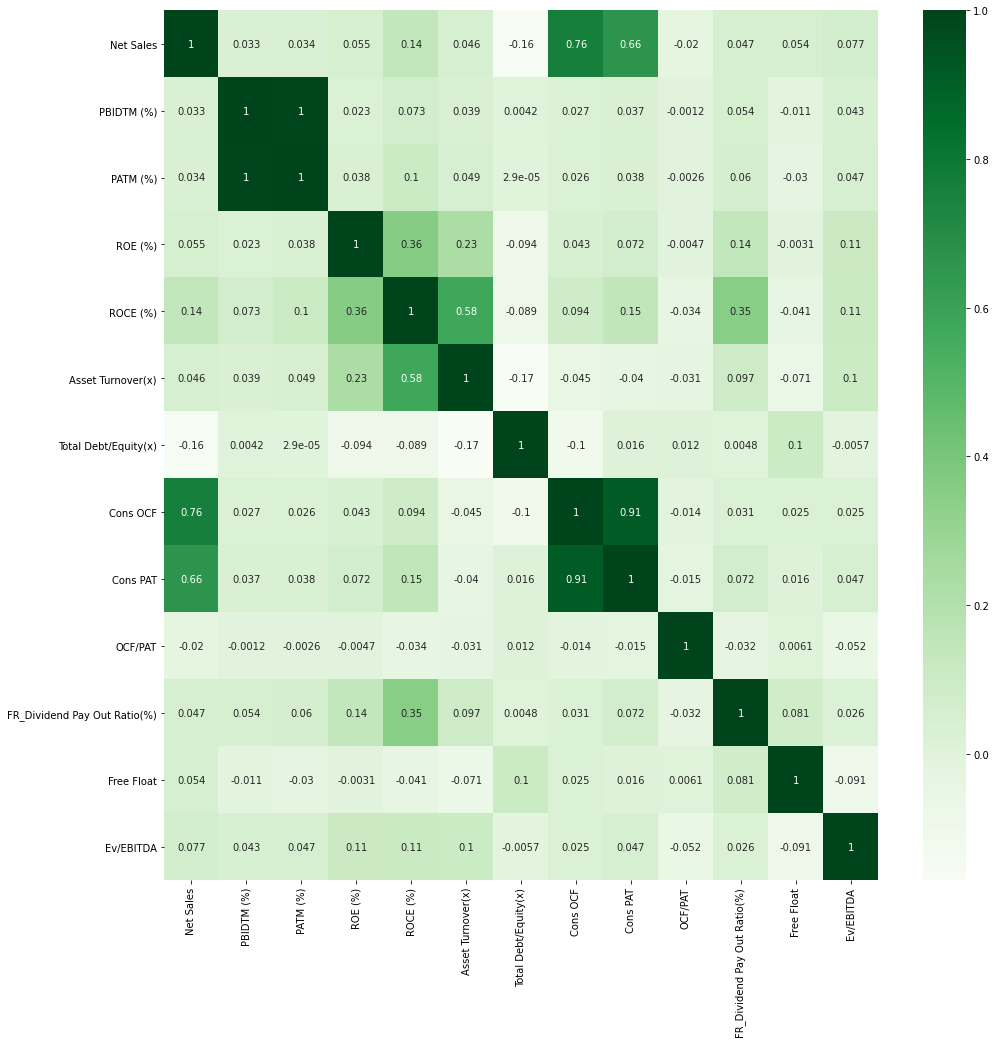

In [24]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [28]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.06]
relevant_features.index

Index(['Net Sales', 'ROE (%)', 'ROCE (%)', 'Asset Turnover(x)', 'Free Float',
       'Ev/EBITDA'],
      dtype='object')

In [29]:
X,y = data1[['Net Sales', 'ROE (%)', 'ROCE (%)', 'Asset Turnover(x)', 'Free Float']], data1['Ev/EBITDA']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [ ]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

mm_X = MinMaxScaler()
X = mm_X.fit_transform(X)
rs_X = RobustScaler()
X = rs_X.fit_transform(X)
'''

'\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler\n\n\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n\nmm_X = MinMaxScaler()\nX = mm_X.fit_transform(X)\nrs_X = RobustScaler()\nX = rs_X.fit_transform(X)\n'

In [31]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [33]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5)))

 0 LassoCV                 14.9386100000
 1 XGBRegressor            17.5354200000
 2 RidgeCV                 14.8272600000
 3 BayesianRidge           14.9337000000
 4 ARDRegression           14.9268600000
 5 ElasticNetCV            14.9386400000
 6 LassoLarsCV             14.9325100000
 7 SVR                     14.9196100000


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [35]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.00249
 1 XGBRegressor            -0.37445
 2 RidgeCV                 0.01730
 3 BayesianRidge           0.00314
 4 ARDRegression           0.00406
 5 ElasticNetCV            0.00248
 6 LassoLarsCV             0.00330
 7 SVR                     0.00502


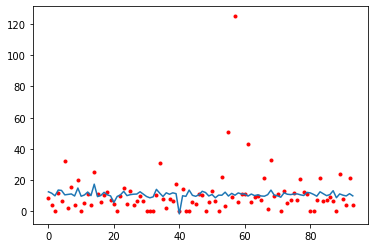

In [36]:
#plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])


# **M/Sales Prediction**

In [37]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [38]:
data2.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.500000,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.950000,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,22.332181,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.150000,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.680000,2.50


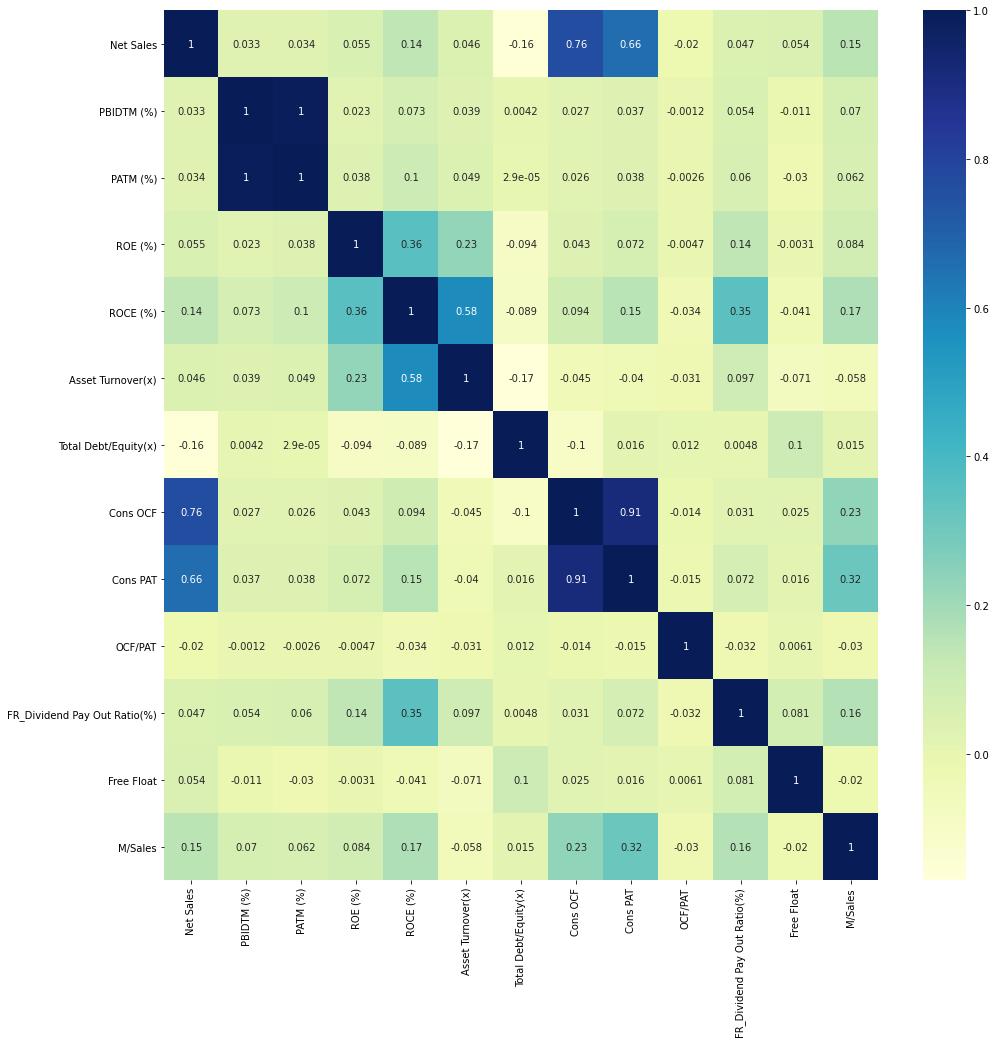

In [39]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [41]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>0.1]
relevant_features.index

Index(['Net Sales', 'ROCE (%)', 'Cons OCF', 'Cons PAT',
       'FR_Dividend Pay Out Ratio(%)', 'M/Sales'],
      dtype='object')

In [42]:
X,y = data2[['Net Sales', 'ROCE (%)', 'Cons OCF', 'Cons PAT',
       'FR_Dividend Pay Out Ratio(%)']], data2['M/Sales']

In [ ]:
'''from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

mm_X = MinMaxScaler()
X = mm_X.fit_transform(X)


rs_X = RobustScaler()
X = rs_X.fit_transform(X)
'''

'\nmm_X = MinMaxScaler()\nX = mm_X.fit_transform(X)\n\n\nrs_X = RobustScaler()\nX = rs_X.fit_transform(X)\n'

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [44]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [45]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 5.10204
 1 XGBRegressor            5.21133
 2 RidgeCV                 5.10753
 3 BayesianRidge           5.10063
 4 ARDRegression           5.22820
 5 ElasticNetCV            5.10198
 6 LassoLarsCV             5.12986
 7 SVR                     5.22244


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [46]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.03861
 1 XGBRegressor            -0.00302
 2 RidgeCV                 0.03654
 3 BayesianRidge           0.03914
 4 ARDRegression           -0.00953
 5 ElasticNetCV            0.03863
 6 LassoLarsCV             0.02809
 7 SVR                     -0.00730


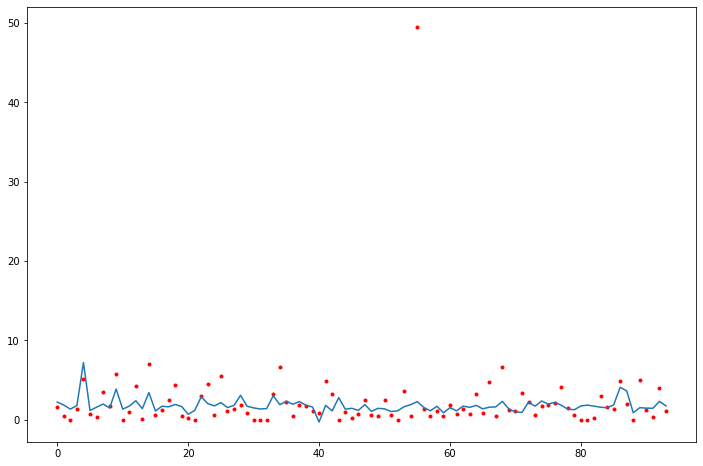

In [47]:
plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[2])
